In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_features=5 , n_redundant=0 ,n_informative=5 , n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.682498,1.719336,0.164634,0.585204,2.781774,1
1,0.530725,0.363894,0.831108,-0.081550,0.455861,0
2,-2.623025,1.726649,2.351467,-0.906460,-0.927788,0
3,-0.823440,1.869104,1.195234,-1.984232,-0.158236,0
4,-1.654730,-0.885068,2.081171,-1.576135,1.994509,1


In [10]:
# function for row sampling
def sample_row(df,percent):
    return df.sample(int(df.shape[0]*percent),replace=True)

In [11]:
# function for column sampling
def sample_col(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]))

In [12]:
# function for row and col sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_row(df,row_percent)
    return sample_col(new_df,col_percent)

In [13]:
df1 = sample_row(df,0.1)
df2 = sample_row(df,0.1)
df3 = sample_row(df,0.1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:,:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.135\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.5, 'x[1] <= -1.911\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

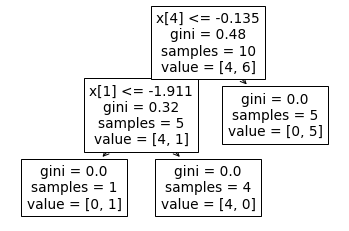

In [17]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.83\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.5, 'x[4] <= 3.437\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

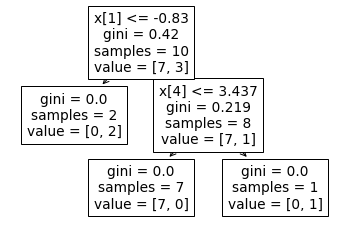

In [18]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= -0.888\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

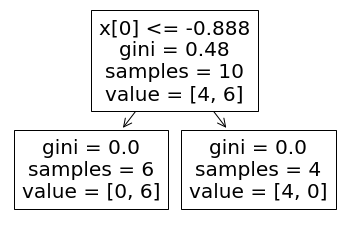

In [19]:
plot_tree(clf3)

In [23]:
yp1

array([1])

In [24]:
yp2

array([0])

In [25]:
yp3

array([0])

# Bagging Vs Random Forest

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [12]:
x,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [13]:
bag = BaggingClassifier(max_features=2)

In [14]:
bag.fit(x,y)

BaggingClassifier(max_features=2)

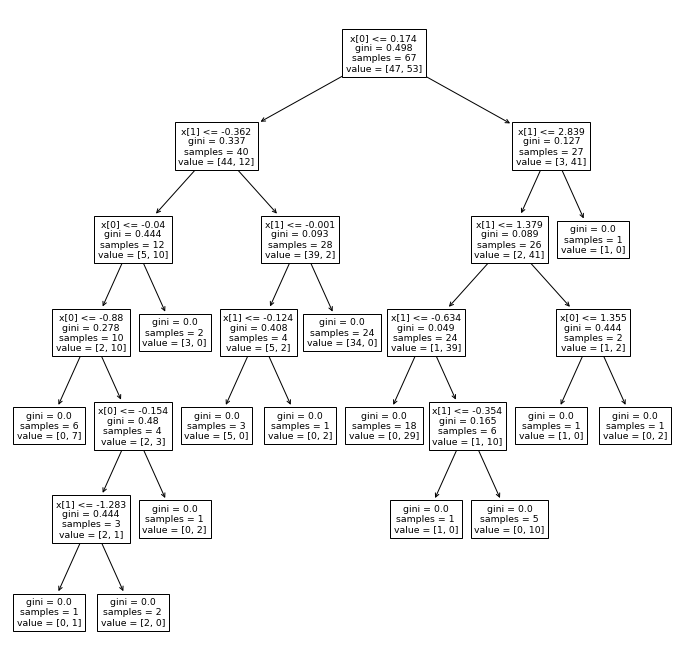

1.0

In [15]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
accuracy_score(y,bag.predict(x))

In [6]:
rf = RandomForestClassifier(max_features=2)

In [7]:
rf.fit(x,y)

RandomForestClassifier(max_features=2)

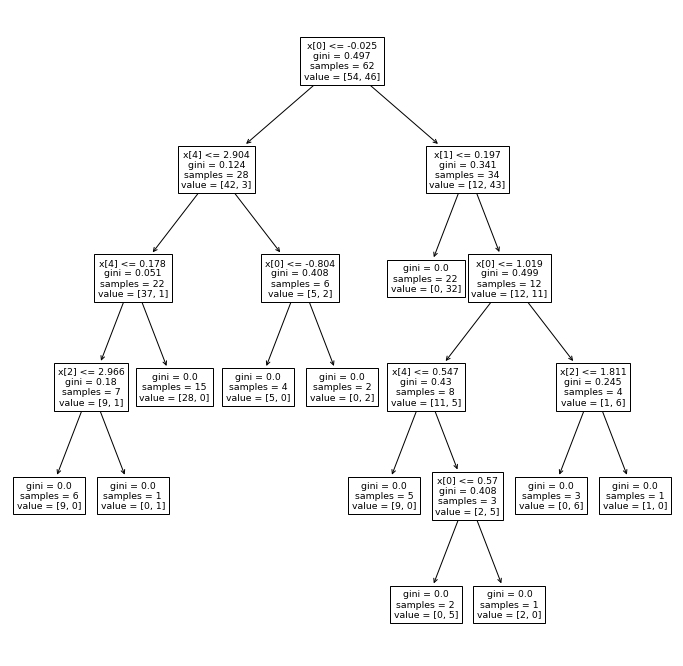

0.13

In [17]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()
accuracy_score(y,rf.predict(x))

# Hyperparameter Tuning Using Gridsearch and Randomsearch

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
x=df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred )

0.9016393442622951

In [30]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),x,y,cv=10,scoring='accuracy'))

0.8279569892473118

## GridSearchCV

In [31]:
#Number of tress in random forest
n_estimators = [20,60,100,120]

#Number of features to be considered at every split
max_features = [0.2,0.6,1.0]

#Maximam numbers of levels in a tree
max_depth = [2,8,None]

# number of samples
max_samples = [0.5,0.75,1.0]

In [33]:
para_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'max_samples' : max_samples
}

In [34]:
rf = RandomForestClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
rf_grid = GridSearchCV(estimator = rf,param_grid = para_grid,cv=5,verbose=2,n_jobs=-1)

In [37]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [38]:
rf_grid.best_score_

0.8430272108843537

In [39]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=2, max_features=0.6, max_samples=0.5,
                       n_estimators=20)

## RandomSearchCV

In [40]:
#Number of tress in random forest
n_estimators = [20,60,100,120]

#Number of features to be considered at every split
max_features = [0.2,0.6,1.0]

#Maximam numbers of levels in a tree
max_depth = [2,8,None]

# number of samples
max_samples = [0.5,0.75,1.0]

#bootstrap 
bootstrap = [True,False]

#Minimum Number of samples required to split a node
min_sample_split = [2,5]

#Minimum number of sample rquired at each leaf node
min_sample_leaf = [1,2]

In [42]:
para_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'max_samples' : max_samples,
    'bootstrap' : bootstrap,
    'min_samples_split' : min_sample_split,
    'min_samples_leaf' : min_sample_leaf
}

In [45]:
rf = RandomForestClassifier()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
rf_grid = RandomizedSearchCV(estimator=rf ,param_distributions = para_grid,cv=5,verbose=2,n_jobs=-1 )

In [49]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [50]:
rf_grid.best_score_

0.8138605442176872

In [51]:
rf_grid.best_estimator_

RandomForestClassifier(max_features=0.2, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=120)